Estimated wave speed c ≈ 1.8904486287732873


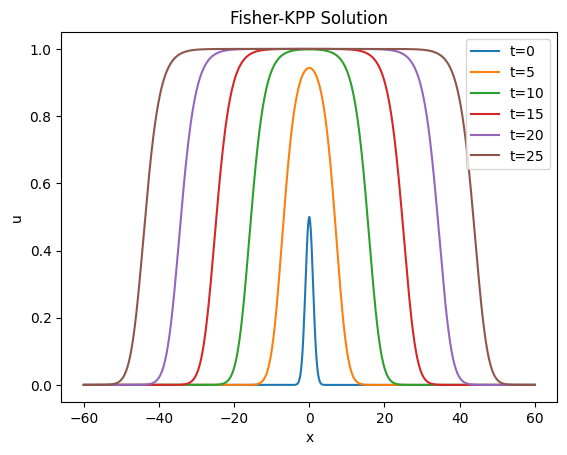

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Parameters ----
xL, xR = -60, 60
N = 600
dx = (xR - xL) / N
dt = 0.4 * dx**2      # stability condition
T = 30
sigma = 1

x = np.linspace(xL, xR, N+1)

# ---- Initial condition ----
u = 0.5 * np.exp(-x**2 / (2*sigma))
#u = 1 / (1+np.exp(x/sigma))
# ---- For tracking front speed ----
times = []
front = []

# ---- Time stepping ----
t = 0
snapshots = {}

for step in range(int(T/dt)):
    # store snapshots every ~5 time units
    if abs(t - round(t/5)*5) < dt:
        snapshots[round(t/5)*5] = u.copy()

    # record front position where u=0.5
    if u.max() > 0.5:
        idx = np.argmax(u >= 0.5)
        # linear interpolation for accuracy
        if idx > 0:
            x1, x2 = x[idx-1], x[idx]
            u1, u2 = u[idx-1], u[idx]
            xf = x1 + (0.5-u1)*(x2-x1)/(u2-u1)
        else:
            xf = x[0]
        times.append(t)
        front.append(xf)

    # ---- Explicit Euler step ----
    un = u.copy()
    lap = (un[2:] - 2*un[1:-1] + un[:-2]) / dx**2
    u[1:-1] = un[1:-1] + dt*(lap + un[1:-1]*(1-un[1:-1]))

    # Neumann boundaries: u_x = 0
    u[0] = u[1]
    u[-1] = u[-2]

    t += dt

# ---- Estimate wave speed c ----
times = np.array(times)
front = np.array(front)
mask = times > 10          # avoid transient
c_est = np.polyfit(times[mask], front[mask], 1)[0]

print("Estimated wave speed c ≈", abs(c_est))

# ---- Plot snapshots ----
for k in sorted(snapshots.keys()):
    plt.plot(x, snapshots[k], label=f"t={k}")
plt.legend()
plt.xlabel("x")
plt.ylabel("u")
plt.title("Fisher-KPP Solution")
plt.show()
